# Support Vector Classifier Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Create synthetic data points
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2,n_classes=2, n_clusters_per_class=1,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

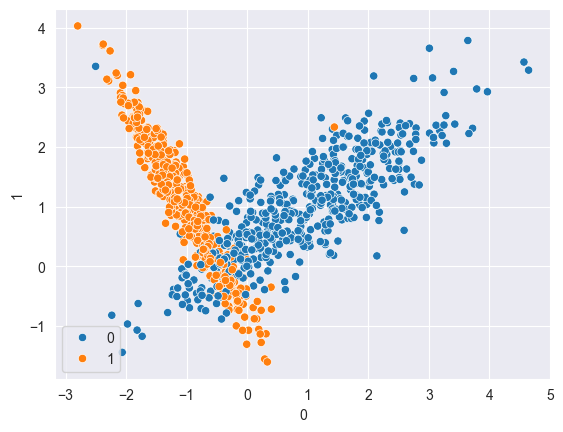

In [47]:
df = pd.DataFrame(X)
sns.scatterplot(x=df[0], y=df[1], hue=y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [5]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[118   2]
 [  3 127]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.98      0.98      0.98       130

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



### RBF Kernel

In [9]:
rbf = SVC(kernel='rbf')
rbf.fit(X_train, y_train)
y_pred1 = rbf.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[118   2]
 [  3 127]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.98      0.98      0.98       130

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



### Polynomial kernel

In [10]:
polynomial = SVC(kernel='poly')
polynomial.fit(X_train, y_train)
y_pred2 = polynomial.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[115   5]
 [  2 128]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       120
           1       0.96      0.98      0.97       130

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



### Sigmoid

In [11]:
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)
y_pred3 = sigmoid.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[101  19]
 [  4 126]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       120
           1       0.87      0.97      0.92       130

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



### Hyperparameter tuning with SVC

In [13]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {'C'  : [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [14]:
grid=GridSearchCV(SVC(),param_grid=param_grid, refit=True, cv=5, verbose=3)

In [15]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.967 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


In [16]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [17]:
y_pred4 = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[118   2]
 [  3 127]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.98      0.98      0.98       130

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



# SVM Kernels Indepth Intuition And Practical Explanation

In [63]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y, -y])
x=np.hstack([x,-x])

In [64]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

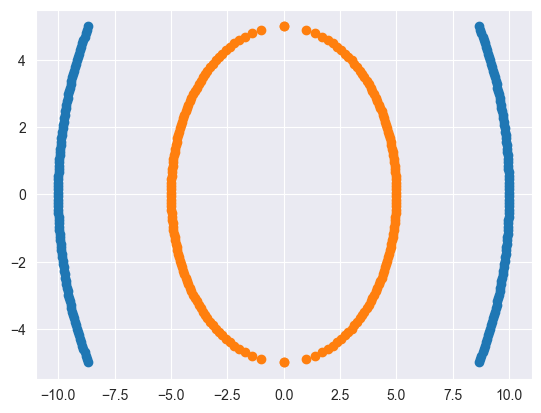

In [65]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [66]:
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['x1','x2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['x1','x2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df.head(5)

,x1,x2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [23]:
df.tail(5)

,x1,x2,Y
395,-8.881281,-4.59596,1
396,-8.828277,-4.69697,1
397,-8.773790,-4.79798,1
398,-8.717792,-4.89899,1
399,-8.660254,-5.00000,1


In [67]:
# Independent and Dependent features
X = df.iloc[:, :2]
y = df.Y

In [68]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [69]:
# find components for the polynomial kernel
# X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['x1']**2
df['X2_Square']= df['x2']**2
df['X1*X2']= (df['x1']*df['x2'])
df.head()

,x1,x2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [70]:
X = df[['x1', 'x2', 'X1_Square', 'X2_Square', 'X1*X2']]
y = df['Y']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [72]:
X_train

,x1,x2,X1_Square,X2_Square,X1*X2
57,9.971263,0.757576,99.426079,0.573921,7.553987
87,9.254835,3.787879,85.651974,14.348026,35.056194
357,-4.942275,-0.757576,24.426079,0.573921,3.744147
355,-4.969040,-0.555556,24.691358,0.308642,2.760578
238,4.863193,-1.161616,23.650648,1.349352,-5.649164
...,...,...,...,...,...
369,-4.595682,-1.969697,21.120294,3.879706,9.052101
320,-4.015072,2.979798,16.120804,8.879196,-11.964104
15,9.373144,-3.484848,87.855831,12.144169,-32.663987
125,-9.688943,2.474747,93.875625,6.124375,-23.977688


In [73]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1', y='x2', z='X1*X2', color='Y')
fig.show()

In [74]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2', color='Y')
fig.show()

In [75]:
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [76]:
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [77]:
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [78]:
from sklearn.metrics import accuracy_score
classifier = SVC(kernel='sigmoid')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Support Vector Regression Implementation

In [80]:
## Dataset (Tips Dataset)
import seaborn as sns
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [83]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [84]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [87]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [88]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [89]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [91]:
# independent and dependent features
X=df[['tip', 'sex', 'smoker', 'day','time', 'size',]]
y=df['total_bill']

In [92]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [93]:
# Feature Encoding(Label Encoding and One Hot Encoding)
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()
le3= LabelEncoder()
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

In [94]:
X_train.head()

,tip,sex,smoker,day,time,size
58,1.76,1,1,Sat,0,2
1,1.66,1,0,Sun,0,3
2,3.50,1,0,Sun,0,3
68,2.01,1,0,Sat,0,2
184,3.00,1,1,Sun,0,2


In [95]:
X_test['sex']=le1.transform(X_test['sex'])
X_test['smoker']=le2.transform(X_test['smoker'])
X_test['time']=le3.transform(X_test['time'])

In [96]:
# Onehot encoding --- ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'),[3])], remainder='passthrough')

In [99]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
X_train=ct.fit_transform(X_train)

In [100]:
X_test=ct.transform(X_test)


In [101]:
# SVR -- Support Vector Regression
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train, y_train)
y_pred=svr.predict(X_test)

In [102]:
from sklearn.metrics import r2_score, mean_absolute_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.46028114561159283
4.1486423210190235


In [103]:
# Hyperparameter Tuning using GridSearch CV
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {'C'  : [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid=GridSearchCV(SVR(),param_grid=param_grid, refit=True, cv=5, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.058 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.145 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.025 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.089 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.013 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.010 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.124 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.050 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.053 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [104]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [105]:
grid_prediction = grid.predict(X_test)

In [107]:
print(r2_score(y_test, grid_prediction))
print(mean_absolute_error(y_test, grid_prediction))

0.5081618245078687
3.8685147526100234
